In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading the data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# converting to the right time value

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [44]:
# filtering for only US jobs
df_US = df[df['job_country'] == 'United States'].copy() # creating a copy just for incasity,yikes!

In [45]:
df_US.head(5) # inspecting your data

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [46]:
# creating a new column of job_posted_month from the job_posted_date
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B') # converting to a verbiage of the month. i.e january

In [47]:
df_US.sample(5) #inspecting your data

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
499015,Data Scientist,Lead Data Scientist,"Thousand Oaks, CA",via LinkedIn,Full-time,False,"California, United States",2023-09-07 11:03:22,False,True,United States,None,NaN,NaN,Cognizant,"['sql', 'aws']","{'cloud': ['aws'], 'programming': ['sql']}",September
575194,Data Engineer,Data Engineer,"Providence, RI",via Indeed,Full-time,False,"Florida, United States",2023-09-06 09:06:16,True,False,United States,None,NaN,NaN,Tata Consultancy Services,"['sql', 'python', 'azure', 'spark', 'jenkins']","{'cloud': ['azure'], 'libraries': ['spark'], '...",September
552788,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-06-14 19:08:10,False,True,United States,None,NaN,NaN,PILYTIX,"['python', 'sql', 'postgresql', 'bigquery', 'g...","{'cloud': ['bigquery', 'gcp'], 'databases': ['...",June
324509,Senior Data Engineer,Senior / Staff Research Engineer - Data Scienc...,United States,via BeBee,Full-time,False,"Texas, United States",2023-08-16 17:04:56,False,True,United States,None,NaN,NaN,Insitro,['python'],{'programming': ['python']},August
651876,Data Engineer,Data Analyst/Data Engineer,"Atlanta, GA",via LinkedIn,Full-time,False,Georgia,2023-12-25 10:51:49,False,True,United States,year,72500.0,NaN,Jobot,"['powershell', 'sql', 'sql server', 'azure']","{'cloud': ['azure'], 'databases': ['sql server...",December


In [48]:
# creating our pivot table for plotting
df_US.pivot_table(index= 'job_posted_month', columns= 'job_title_short', aggfunc= 'size')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [49]:
# to rearrange the months in a chronological order we reset_index
df_US_pivot = df_US.pivot_table(index= 'job_posted_month', columns= 'job_title_short', aggfunc= 'size') #assigmnet, for ease of calling
df_US_pivot.reset_index(inplace=True)

In [50]:
# creating a new column of month in numerical order for ease of manipulation
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format= '%B').dt.month # converting to month and then extracting only the numerical month number

In [51]:
# inspecting
df_US_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [52]:
df_US_pivot.sort_values('month_no', inplace= True)

In [53]:
df_US_pivot.set_index('job_posted_month', inplace= True) # resetting job_posted_month as the index

In [54]:
df_US_pivot.drop(columns= 'month_no', inplace= True) # served its purpose

In [55]:
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [56]:
# to plot only the top 5 jobs per month
top_5 = df_US['job_title_short'].value_counts().head(5)
top_5 = top_5.index.tolist()

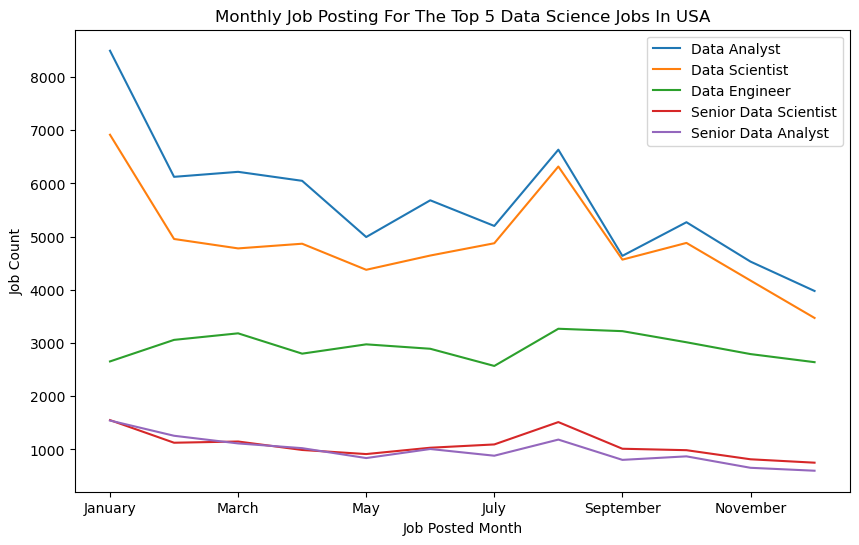

In [57]:
# plotting
df_US_pivot[top_5].plot(kind= 'line', figsize= (10,6))
plt.xlabel('Job Posted Month')
plt.ylabel('Job Count')
plt.title('Monthly Job Posting For The Top 5 Data Science Jobs In USA')
plt.legend()
plt.show()